## Remove Duplicates

In [20]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = 'diabetes_data.csv'
diabetes_data = pd.read_csv(file_path)

# Display the first few rows and column information for analysis
diabetes_data_info = diabetes_data.info()
diabetes_data_head = diabetes_data.head()

diabetes_data_info, diabetes_data_head

# Assuming your dataframe is named 'diabetes_data'
diabetes_data = diabetes_data.drop_duplicates()

# Verify that duplicates have been removed
print(f"Dataset shape after removing duplicates: {diabetes_data.shape}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                             --------------  ----- 
 0   age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class  520 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
Dataset shape after removing duplicates: (251, 1)


## Importing Libraries

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, log_loss, matthews_corrcoef, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB




## Column Correction

In [22]:
# Splitting the single column into individual features based on the semicolon delimiter
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class']\
    .str.split(';', expand=True)

# Renaming columns based on the original dataset structure
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Converting data types where appropriate
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Displaying a summary of the cleaned data
diabetes_data_cleaned_info = diabetes_data_cleaned.info()
diabetes_data_cleaned_head = diabetes_data_cleaned.head()

diabetes_data_cleaned_info, diabetes_data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 251 non-null    int64 
 1   gender              251 non-null    object
 2   polyuria            251 non-null    object
 3   polydipsia          251 non-null    object
 4   sudden_weight_loss  251 non-null    object
 5   weakness            251 non-null    object
 6   polyphagia          251 non-null    object
 7   genital_thrush      251 non-null    object
 8   visual_blurring     251 non-null    object
 9   itching             251 non-null    object
 10  irritability        251 non-null    object
 11  delayed_healing     251 non-null    object
 12  partial_paresis     251 non-null    object
 13  muscle_stiffness    251 non-null    object
 14  alopecia            251 non-null    object
 15  obesity             251 non-null    object
 16  class               251 non-nul

(None,
    age gender polyuria polydipsia sudden_weight_loss weakness polyphagia  \
 0   40   Male        0          1                  0        1          0   
 1   58   Male        0          0                  0        1          0   
 2   41   Male        1          0                  0        1          1   
 3   45   Male        0          0                  1        1          1   
 4   60   Male        1          1                  1        1          1   
 
   genital_thrush visual_blurring itching irritability delayed_healing  \
 0              0               0       1            0               1   
 1              0               1       0            0               0   
 2              0               0       1            0               1   
 3              1               0       1            0               1   
 4              0               1       1            1               1   
 
   partial_paresis muscle_stiffness alopecia obesity  class  
 0               0   

## Pre-Processing DATA

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, log_loss, matthews_corrcoef, roc_curve, auc, classification_report

# Load and preprocess the dataset
data = 'diabetes_data.csv'  # Replace with your file path
diabetes_data = pd.read_csv(data)

# Clean the data if needed
diabetes_data_cleaned = diabetes_data.iloc[:, 0].str.split(';', expand=True)
columns = [
    "age", "gender", "polyuria", "polydipsia", "sudden_weight_loss", "weakness", 
    "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", 
    "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity", 
    "class"
]
diabetes_data_cleaned.columns = columns

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'class']:
    le = LabelEncoder()
    diabetes_data_cleaned[column] = le.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = le

# Separate features and target
X = diabetes_data_cleaned.drop(columns=["class"])
y = diabetes_data_cleaned["class"]

# Normalize numerical features
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])


## PCA

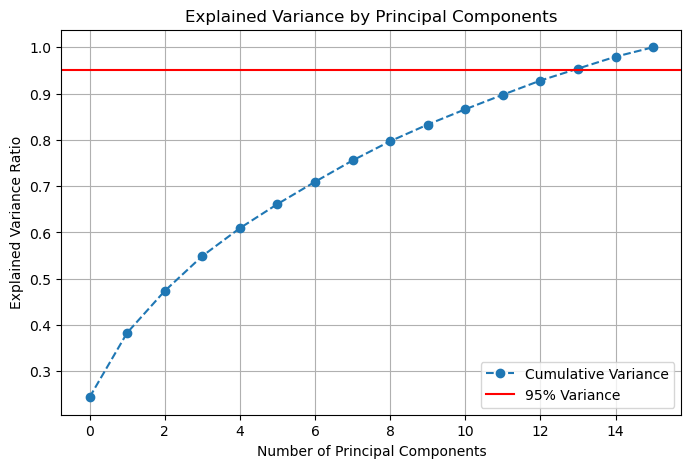

Number of components to retain 95% variance: 14

Explained Variance by Component:
Principal Component 1: 0.2442
Principal Component 2: 0.1392
Principal Component 3: 0.0903
Principal Component 4: 0.0754
Principal Component 5: 0.0602
Principal Component 6: 0.0520
Principal Component 7: 0.0481
Principal Component 8: 0.0461
Principal Component 9: 0.0415
Principal Component 10: 0.0360
Principal Component 11: 0.0330
Principal Component 12: 0.0315

Top contributing features to the first 12 principal components:
                         PC1       PC2       PC3       PC4       PC5  \
age                 0.247639  0.332163 -0.037396  0.268348 -0.139031   
gender             -0.210226  0.314712  0.183609  0.209758 -0.142707   
polyuria            0.341376 -0.176358  0.276735 -0.037978 -0.085701   
polydipsia          0.347392 -0.234118  0.162873 -0.070116  0.058947   
sudden_weight_loss  0.252097 -0.225500  0.352508 -0.072283  0.224008   
weakness            0.286994  0.124274  0.021332 -0.222908

In [24]:
diabetes_data = pd.read_csv('diabetes_data.csv')

# Split the single column if needed (adjust column splitting as necessary)
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class'] \
    .str.split(';', expand=True)

# Rename the columns
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Convert data types
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['gender'] = diabetes_data_cleaned['gender'].map({'Male': 1, 'Female': 0})
binary_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
    'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'
]
diabetes_data_cleaned[binary_columns] = diabetes_data_cleaned[binary_columns].astype(int)
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Separate features and target
features = diabetes_data_cleaned.drop(columns=['class'])
target = diabetes_data_cleaned['class']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.legend()
plt.grid()
plt.show()

# Determine the number of components for 95% variance
num_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components to retain 95% variance: {num_components_95}")

# Display explained variance for each component
print("\nExplained Variance by Component:")
for i, variance in enumerate(explained_variance_ratio[:12]):
    print(f"Principal Component {i + 1}: {variance:.4f}")

# Display the top contributing features to the first 12 principal components
pca_optimal = PCA(n_components=12)
features_reduced = pca_optimal.fit_transform(features_scaled)

# Get the component loadings (contributions of original features)
loadings = pca_optimal.components_

# Create a DataFrame for easy visualization
feature_names = features.columns
loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=[f'PC{i+1}' for i in range(12)])

print("\nTop contributing features to the first 12 principal components:")
print(loadings_df)

# Optionally, to see the absolute contributions and sort them
for i in range(12):
    print(f"\nTop features contributing to PC{i+1}:")
    top_features = loadings_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5)
    print(top_features)


<span style="color: #A5D6A7;">

 ### WHY PCA IS NOT REQUIRED
1. Categorical Features: PCA is not suitable for categorical data unless it's properly encoded (e.g., one-hot encoding or label encoding).

2. Linear Assumption: PCA assumes linear relationships between features, so it may not perform well if your data has non-linear relationships.

3. Variance Preservation: PCA focuses on maximizing variance, which might lead to the loss of important features for classification if they do not exhibit high variance.

4. Scaling Sensitivity: PCA is sensitive to the scale of features, so you need to standardize or normalize your data to ensure fair comparison across features.

</span>

## Logistic Regression model

LOGISTIC REGRESSION MODEL PERFORMANCE METRICS
Accuracy: 0.93
ROC-AUC Score: 0.99
Log Loss: 0.17
Matthews Correlation Coefficient (MCC): 0.87
Specificity: 0.97
Confusion Matrix:
[[39  1]
 [ 6 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.98      0.91      0.94        64

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



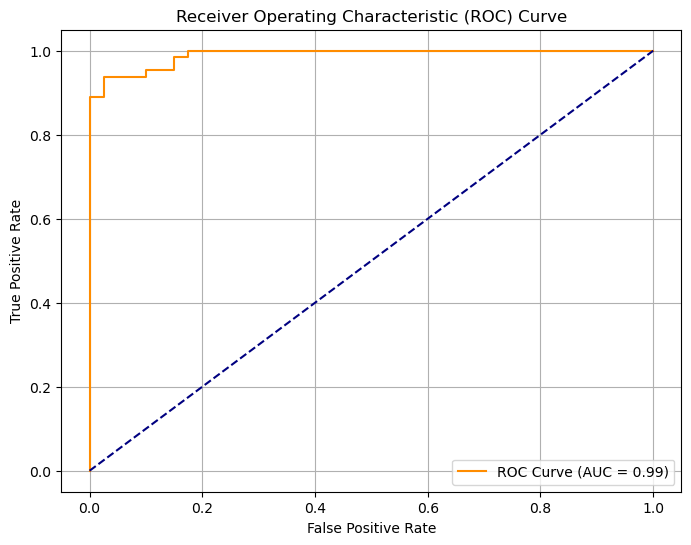

In [25]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the logistic regression model with hyperparameters
logistic_model = LogisticRegression(
    penalty='l2',           # Using L2 regularization
    C=1.0,                  # Default regularization strength
    solver='lbfgs',         # Solver for optimization
    max_iter=200,           # Allowing more iterations for convergence
    class_weight='balanced' # Adjusting for class imbalance
)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Compute metrics
conf_matrix = confusion_matrix(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Display metrics
accuracy = logistic_model.score(X_test, y_test)
classification_rep = classification_report(y_test, y_pred)

print("LOGISTIC REGRESSION MODEL PERFORMANCE METRICS")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc_value:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"Specificity: {specificity:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_value:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Key Hyperparameters in Use for Logistic Regression:

1. **penalty='l2'**: Uses L2 regularization to prevent overfitting by penalizing large coefficients.

2. **C=1.0**: Default regularization strength, balancing the bias-variance tradeoff.

3. **solver='lbfgs'**: Efficient solver for L2 regularization, suitable for small-to-medium datasets.

4. **max_iter=200**: Ensures the model has enough iterations to converge.

5. **class_weight='balanced'**: Handles class imbalance by assigning weights inversely proportional to class frequencies.


## Support Vector Machine (SVM)

SVM Tuned Accuracy: 0.97
SVM Tuned ROC-AUC: 1.00
SVM Log Loss: 0.04
SVM Matthews Correlation Coefficient (MCC): 0.94
SVM Specificity: 1.00
Confusion Matrix:
[[40  0]
 [ 3 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



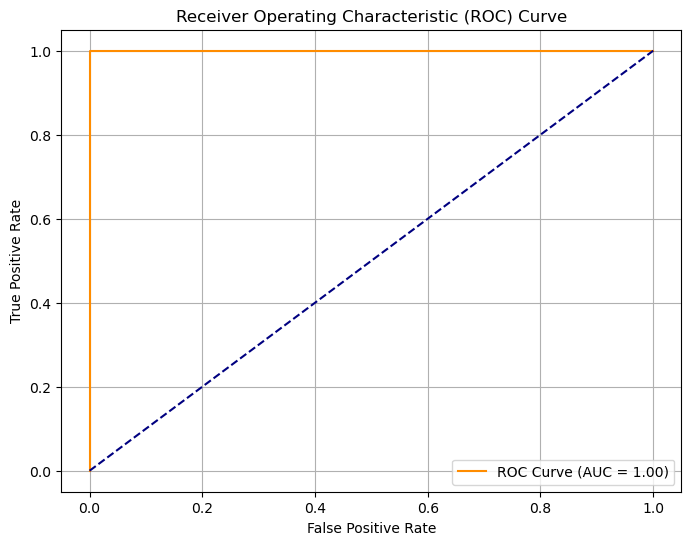

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, log_loss, matthews_corrcoef, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Create the SVM model with probability=True
best_svm_model = SVC(
    C=1.0,                       # Regularization parameter
    kernel='rbf',                 # Kernel type (RBF is commonly used)
    gamma='scale',                # Gamma parameter (scale is a common value)
    class_weight='balanced',      # Handle class imbalance
    decision_function_shape='ovr', # One-vs-Rest approach for multi-class
    tol=1e-3,                     # Stopping criteria tolerance
    max_iter=-1,                  # No maximum iterations
    shrinking=True,               # Use shrinking heuristic
    probability=True              # Enable probability estimates
)

# Train the model
best_svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = best_svm_model.predict(X_test)
svm_pred_proba = best_svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Accuracy and ROC-AUC score
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_pred_proba)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Log Loss
svm_log_loss = log_loss(y_test, svm_pred_proba)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, svm_predictions)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# ROC curve data for plotting
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Display metrics
print(f"SVM Tuned Accuracy: {svm_accuracy:.2f}")
print(f"SVM Tuned ROC-AUC: {svm_roc_auc:.2f}")
print(f"SVM Log Loss: {svm_log_loss:.2f}")
print(f"SVM Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"SVM Specificity: {specificity:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_value:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Explanation of Hyperparameters for Support Vector Machine (SVM):

1. **C=1.0**: The regularization parameter. Controls the trade-off between achieving a low error on the training set and minimizing the model complexity.

2. **kernel='rbf'**: Radial Basis Function (RBF) kernel is typically used for non-linear decision boundaries. It transforms the input space into a higher-dimensional space.

3. **gamma='scale'**: The coefficient for the kernel function. With `gamma='scale'`, it is automatically set to 1 / (n_features * X.var()), which is a commonly used value.

4. **class_weight='balanced'**: This helps deal with imbalanced class distributions by adjusting the weight of each class inversely proportional to its frequency in the dataset.

5. **decision_function_shape='ovr'**: This parameter is used for multi-class classification. 'ovr' (One-vs-Rest) builds a binary classifier for each class.

6. **tol=1e-3**: The tolerance for stopping criteria. If the optimization does not improve beyond this threshold, the algorithm will stop.

7. **max_iter=-1**: There is no maximum iteration by default. The optimization process will run until convergence or until it reaches the stopping criteria.

8. **shrinking=True**: Enables the shrinking heuristic to speed up the training of the SVM model by discarding certain support vectors early on.


## Naive Bayes

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Naive Bayes Accuracy: 0.94
Naive Bayes ROC-AUC: 0.99
Naive Bayes Log Loss: 0.20
Naive Bayes MCC: 0.88
Naive Bayes Specificity: 0.95
Naive Bayes Confusion Matrix:
 [[38  2]
 [ 4 60]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



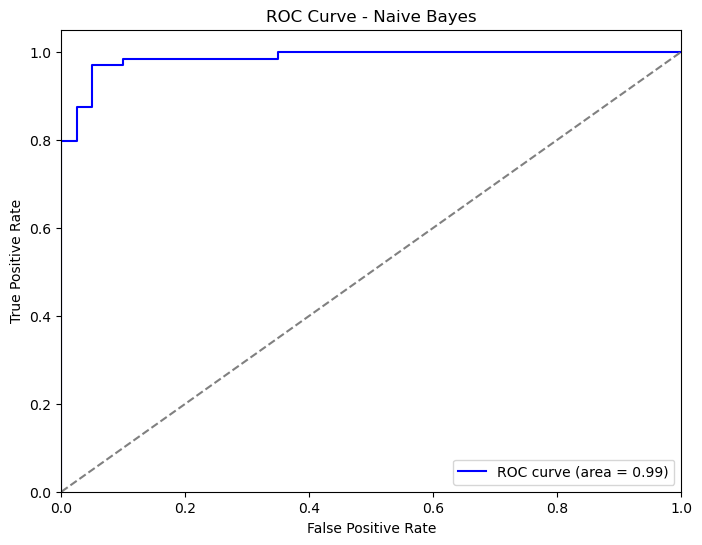

In [27]:

# Define the Naive Bayes model
nb_model = GaussianNB()  # You can switch between GaussianNB, MultinomialNB, or BernoulliNB

# Define hyperparameters for GaussianNB
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Define hyperparameters for MultinomialNB
# Here, alpha is a smoothing parameter for multinomial distribution
# fit_prior is used for adjusting class priors
multinomial_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Define hyperparameters for BernoulliNB
# Similar to MultinomialNB but used for binary/boolean features
bernoulli_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# You can use a different Naive Bayes model by switching the `nb_model`
# GridSearchCV for tuning the model's hyperparameters
if isinstance(nb_model, GaussianNB):
    nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
elif isinstance(nb_model, MultinomialNB):
    nb_grid = GridSearchCV(estimator=nb_model, param_grid=multinomial_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
elif isinstance(nb_model, BernoulliNB):
    nb_grid = GridSearchCV(estimator=nb_model, param_grid=bernoulli_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
nb_grid.fit(X_train, y_train)

# Best model evaluation
best_nb_model = nb_grid.best_estimator_
nb_predictions = best_nb_model.predict(X_test)
nb_proba = best_nb_model.predict_proba(X_test)[:, 1]

# Metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, nb_proba)
nb_log_loss = log_loss(y_test, nb_proba)
nb_mcc = matthews_corrcoef(y_test, nb_predictions)
nb_specificity = recall_score(y_test, nb_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, nb_predictions)

# Classification report
nb_class_report = classification_report(y_test, nb_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, nb_proba)
roc_auc = auc(fpr, tpr)

# Output metrics
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(f"Naive Bayes ROC-AUC: {nb_roc_auc:.2f}")
print(f"Naive Bayes Log Loss: {nb_log_loss:.2f}")
print(f"Naive Bayes MCC: {nb_mcc:.2f}")
print(f"Naive Bayes Specificity: {nb_specificity:.2f}")
print("Naive Bayes Confusion Matrix:\n", conf_matrix)
print("Naive Bayes Classification Report:\n", nb_class_report)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters Used in Naive Bayes Models:

1. **var_smoothing** (for **GaussianNB**): Regularization parameter to avoid zero variance by adding a small value to the variance of each feature.

2. **alpha** (for **MultinomialNB** and **BernoulliNB**): Smoothing parameter to avoid zero probabilities by adding a small value to all feature counts.

3. **fit_prior** (for **MultinomialNB** and **BernoulliNB**): Determines whether to learn class prior probabilities from the data or use uniform priors.


## k-Nearest Neighbors (k-NN)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


c:\Users\2004a\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


k-NN Accuracy: 0.94
k-NN ROC-AUC: 0.98
k-NN Log Loss: 0.76
k-NN MCC: 0.88
k-NN Specificity: 0.97
k-NN Confusion Matrix:
 [[39  1]
 [ 5 59]]
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



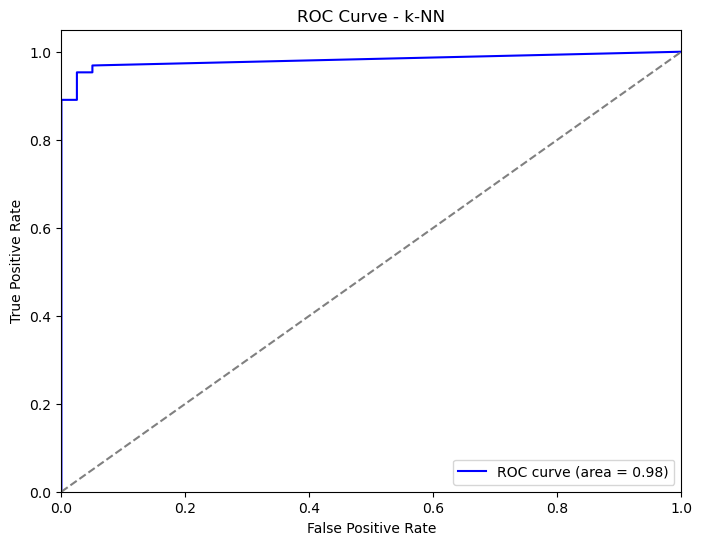

In [28]:
# Define the k-NN model
knn_model = KNeighborsClassifier()

# Define hyperparameters
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

# GridSearchCV for tuning
knn_grid = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
knn_grid.fit(X_train, y_train)

# Best model evaluation
best_knn_model = knn_grid.best_estimator_
knn_predictions = best_knn_model.predict(X_test)
knn_proba = best_knn_model.predict_proba(X_test)[:, 1]

# Metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_proba)
knn_log_loss = log_loss(y_test, knn_proba)
knn_mcc = matthews_corrcoef(y_test, knn_predictions)
knn_specificity = recall_score(y_test, knn_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Classification report
knn_class_report = classification_report(y_test, knn_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_proba)
roc_auc = auc(fpr, tpr)



# Output metrics
print(f"k-NN Accuracy: {knn_accuracy:.2f}")
print(f"k-NN ROC-AUC: {knn_roc_auc:.2f}")
print(f"k-NN Log Loss: {knn_log_loss:.2f}")
print(f"k-NN MCC: {knn_mcc:.2f}")
print(f"k-NN Specificity: {knn_specificity:.2f}")
print("k-NN Confusion Matrix:\n", conf_matrix)
print("k-NN Classification Report:\n", knn_class_report)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - k-NN')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters Used in K-Nearest Neighbors (KNN):

1. **n_neighbors**: The number of neighbors to consider when making a prediction; larger values make the model smoother.

2. **weights**: Determines the weighting of the neighbors; 'uniform' gives equal weight to all neighbors, and 'distance' gives closer neighbors more influence.

3. **metric**: The distance metric to use for calculating neighbor distances; options include:
   - **'euclidean'**: Standard straight-line distance.
   - **'manhattan'**: Distance based on the sum of absolute differences.
   - **'minkowski'**: A generalization of both Euclidean and Manhattan distances.

4. **leaf_size**: The leaf size in the k-d tree algorithm; affects performance and memory usage.

5. **p**: The power parameter for the Minkowski distance; p=1 corresponds to Manhattan distance, and p=2 corresponds to Euclidean distance.


## Decision Tree Classifier

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Decision Tree Accuracy: 0.94
Decision Tree ROC-AUC: 0.99
Decision Tree Log Loss: 0.14
Decision Tree MCC: 0.88
Decision Tree Specificity: 0.97
Decision Tree Confusion Matrix:
 [[39  1]
 [ 5 59]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



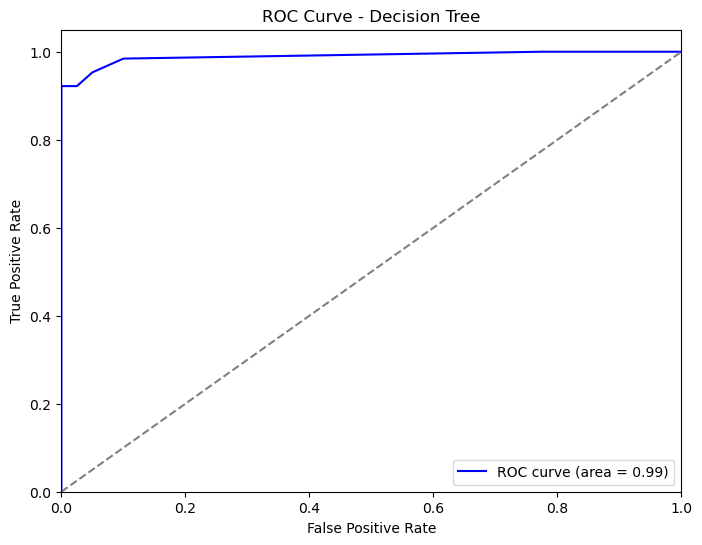

In [29]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters
dt_params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for tuning
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
dt_grid.fit(X_train, y_train)

# Best model evaluation
best_dt_model = dt_grid.best_estimator_
dt_predictions = best_dt_model.predict(X_test)
dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_proba)
dt_log_loss = log_loss(y_test, dt_proba)
dt_mcc = matthews_corrcoef(y_test, dt_predictions)
dt_specificity = recall_score(y_test, dt_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Classification report
dt_class_report = classification_report(y_test, dt_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_proba)
roc_auc = auc(fpr, tpr)



# Output metrics
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Decision Tree ROC-AUC: {dt_roc_auc:.2f}")
print(f"Decision Tree Log Loss: {dt_log_loss:.2f}")
print(f"Decision Tree MCC: {dt_mcc:.2f}")
print(f"Decision Tree Specificity: {dt_specificity:.2f}")
print("Decision Tree Confusion Matrix:\n", conf_matrix)
print("Decision Tree Classification Report:\n", dt_class_report)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Decision Tree (DT):

1. **max_depth**: The maximum depth of the tree; controls the maximum number of splits from the root to the leaves. Deeper trees can lead to overfitting.

2. **min_samples_split**: The minimum number of samples required to split an internal node; higher values prevent the model from learning overly specific patterns (overfitting).

3. **min_samples_leaf**: The minimum number of samples required to be at a leaf node; helps in smoothing the model and reducing overfitting.

4. **criterion**: The function to measure the quality of a split:
   - **'gini'**: Uses the Gini impurity.
   - **'entropy'**: Uses information gain (entropy) as the split criterion.


## Random Forest Classifier

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest Accuracy: 0.99
Random Forest ROC-AUC: 1.00
Random Forest Log Loss: 0.08
Random Forest MCC: 0.98
Random Forest Specificity: 1.00
Random Forest Confusion Matrix:
 [[40  0]
 [ 1 63]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



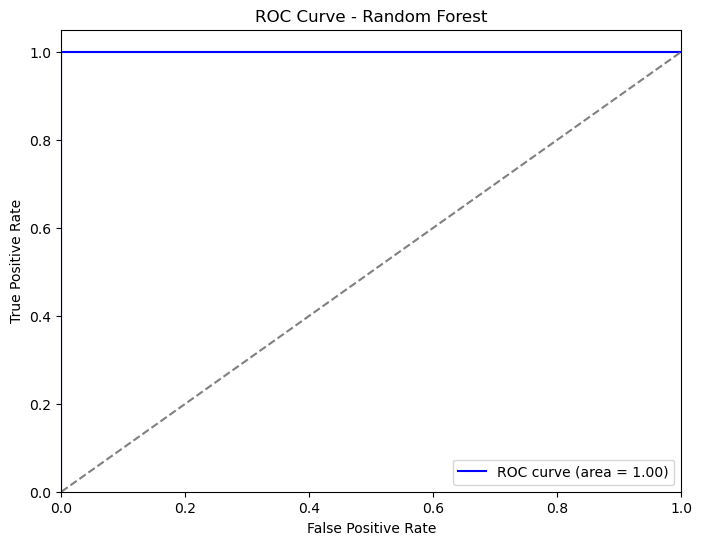

In [30]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for tuning
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

# Best model evaluation
best_rf_model = rf_grid.best_estimator_
rf_predictions = best_rf_model.predict(X_test)
rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_proba)
rf_log_loss = log_loss(y_test, rf_proba)
rf_mcc = matthews_corrcoef(y_test, rf_predictions)
rf_specificity = recall_score(y_test, rf_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Classification report
rf_class_report = classification_report(y_test, rf_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_proba)
roc_auc = auc(fpr, tpr)


# Output metrics
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.2f}")
print(f"Random Forest Log Loss: {rf_log_loss:.2f}")
print(f"Random Forest MCC: {rf_mcc:.2f}")
print(f"Random Forest Specificity: {rf_specificity:.2f}")
print("Random Forest Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", rf_class_report)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Random Forest (RF):

1. **n_estimators**: The number of trees in the forest. More trees can improve performance but also increase computation time.

2. **max_depth**: The maximum depth of the tree; controls the number of splits from the root to the leaves. Deeper trees may lead to overfitting.

3. **min_samples_split**: The minimum number of samples required to split an internal node. Higher values help prevent overfitting by making the model less sensitive to noise.

4. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. It ensures that leaf nodes contain a sufficient number of samples to make more general predictions, reducing overfitting.


## Neural Network

Fitting 3 folds for each of 36 candidates, totalling 108 fits
MLP Accuracy: 0.97
MLP ROC-AUC: 1.00
MLP Log Loss: 0.05
MLP MCC: 0.94
MLP Specificity: 1.00
MLP Confusion Matrix:
 [[40  0]
 [ 3 61]]
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



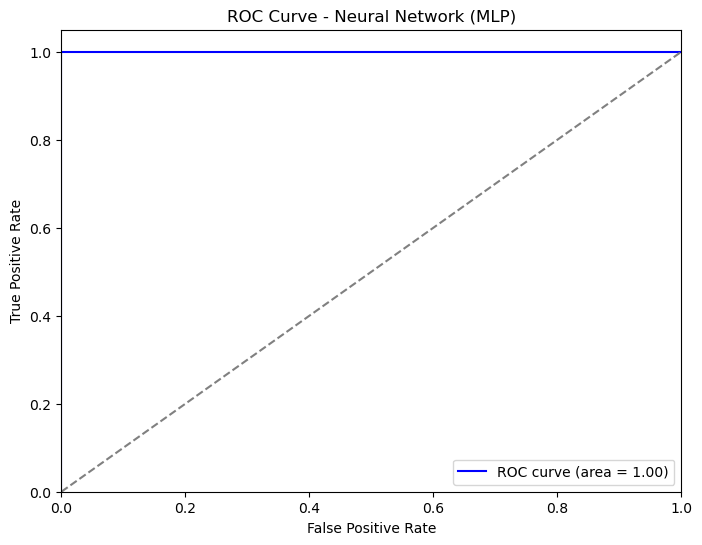

In [31]:
# Define the Neural Network (MLP) model
mlp_model = MLPClassifier(random_state=42)

# Define hyperparameters
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# GridSearchCV for tuning
mlp_grid = GridSearchCV(estimator=mlp_model, param_grid=mlp_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
mlp_grid.fit(X_train, y_train)

# Best model evaluation
best_mlp_model = mlp_grid.best_estimator_
mlp_predictions = best_mlp_model.predict(X_test)
mlp_proba = best_mlp_model.predict_proba(X_test)[:, 1]

# Metrics
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_proba)
mlp_log_loss = log_loss(y_test, mlp_proba)
mlp_mcc = matthews_corrcoef(y_test, mlp_predictions)
mlp_specificity = recall_score(y_test, mlp_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, mlp_predictions)

# Classification report
mlp_class_report = classification_report(y_test, mlp_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, mlp_proba)
roc_auc = auc(fpr, tpr)


# Output metrics
print(f"MLP Accuracy: {mlp_accuracy:.2f}")
print(f"MLP ROC-AUC: {mlp_roc_auc:.2f}")
print(f"MLP Log Loss: {mlp_log_loss:.2f}")
print(f"MLP MCC: {mlp_mcc:.2f}")
print(f"MLP Specificity: {mlp_specificity:.2f}")
print("MLP Confusion Matrix:\n", conf_matrix)
print("MLP Classification Report:\n", mlp_class_report)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (MLP)')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Multi-layer Perceptron (MLP):

1. **hidden_layer_sizes**: Specifies the number of neurons in each hidden layer. For example, `(50,)` means one hidden layer with 50 neurons, and `(50, 50)` means two hidden layers, each with 50 neurons.

2. **activation**: The activation function used in the hidden layers. 
   - **'relu'**: Rectified Linear Unit, commonly used in deep learning for better performance.
   - **'tanh'**: Hyperbolic tangent function, typically used for problems requiring more complex transformations.

3. **solver**: The algorithm for optimization.
   - **'adam'**: Adaptive moment estimation, an efficient optimization algorithm often used for training deep learning models.
   - **'sgd'**: Stochastic gradient descent, a basic optimization algorithm.

4. **learning_rate_init**: The initial learning rate used by the optimizer. It determines how much to change the model's weights with respect to the gradient; lower values can make training slower but more stable.


## Gradient Boosting

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Gradient Boosting Accuracy: 0.99
Gradient Boosting ROC-AUC: 0.99
Gradient Boosting Log Loss: 0.07
Gradient Boosting MCC: 0.98
Gradient Boosting Specificity: 1.00
Gradient Boosting Confusion Matrix:
 [[40  0]
 [ 1 63]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



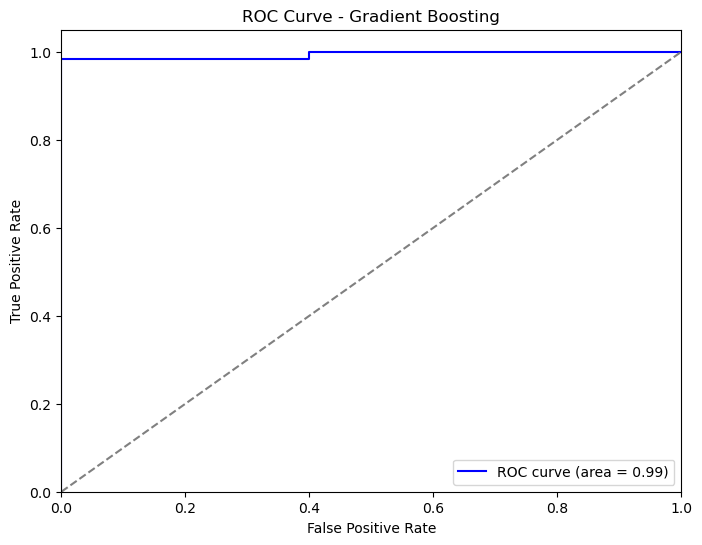

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameters
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for tuning
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
gb_grid.fit(X_train, y_train)

# Best model evaluation
best_gb_model = gb_grid.best_estimator_
gb_predictions = best_gb_model.predict(X_test)
gb_proba = best_gb_model.predict_proba(X_test)[:, 1]

# Metrics
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_roc_auc = roc_auc_score(y_test, gb_proba)
gb_log_loss = log_loss(y_test, gb_proba)
gb_mcc = matthews_corrcoef(y_test, gb_predictions)
gb_specificity = recall_score(y_test, gb_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, gb_predictions)

# Classification report
gb_class_report = classification_report(y_test, gb_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_proba)
roc_auc = auc(fpr, tpr)


# Output metrics
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"Gradient Boosting ROC-AUC: {gb_roc_auc:.2f}")
print(f"Gradient Boosting Log Loss: {gb_log_loss:.2f}")
print(f"Gradient Boosting MCC: {gb_mcc:.2f}")
print(f"Gradient Boosting Specificity: {gb_specificity:.2f}")
print("Gradient Boosting Confusion Matrix:\n", conf_matrix)
print("Gradient Boosting Classification Report:\n", gb_class_report)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Gradient Boosting (GB):

1. **n_estimators**: The number of boosting stages (trees) to be used in the ensemble model. More estimators usually improve model performance but increase computation time.

2. **learning_rate**: The rate at which the model is updated during training. A smaller learning rate makes the training process slower but can lead to better generalization.

3. **max_depth**: The maximum depth of the individual decision trees. A deeper tree can capture more complex patterns but may lead to overfitting.


## Matrics Comparison

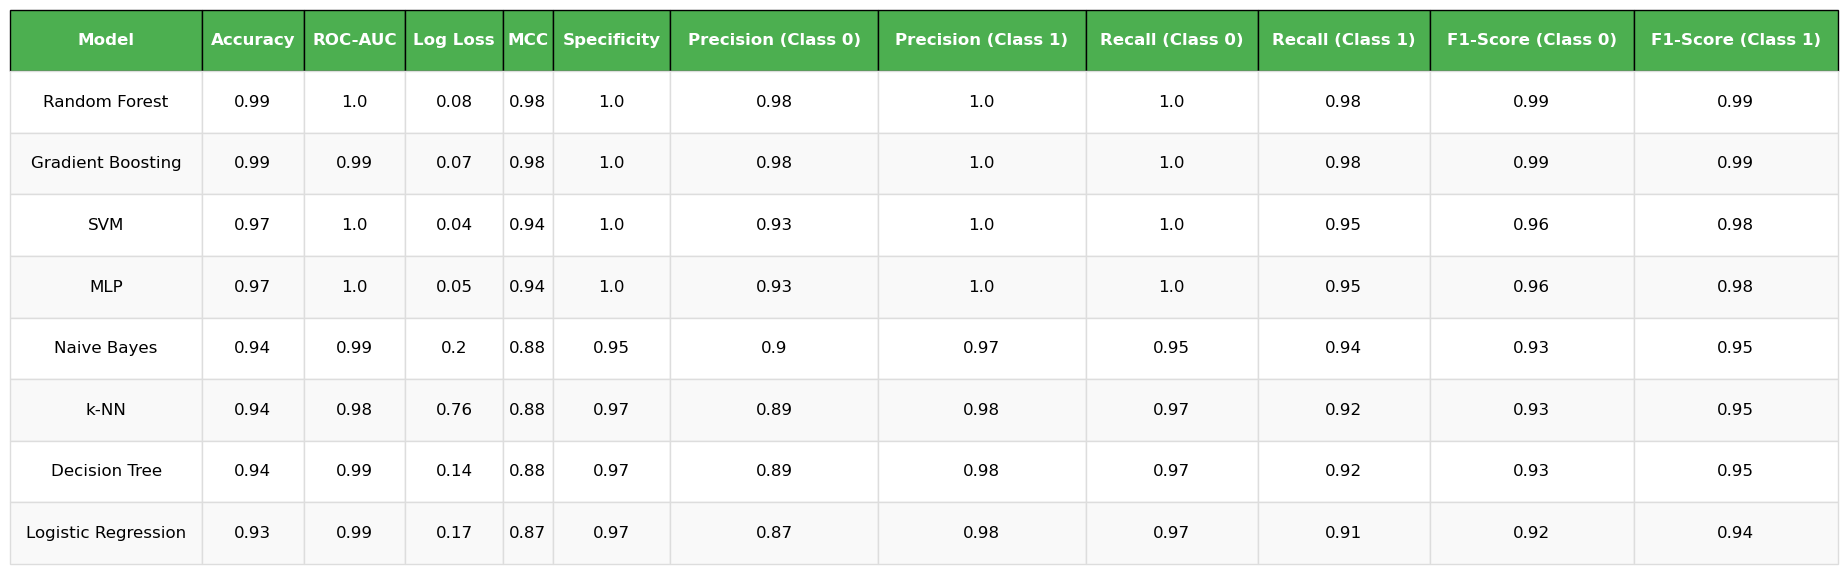

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
     "Model": [
        "Logistic Regression", "SVM", "Naive Bayes", "k-NN", "Decision Tree", 
        "Random Forest", "MLP", "Gradient Boosting"
    ],
    "Accuracy": [0.93, 0.97, 0.94, 0.94, 0.94, 0.99, 0.97, 0.99],
    "ROC-AUC": [0.99, 1.00, 0.99, 0.98, 0.99, 1.00, 1.00, 0.99],
    "Log Loss": [0.17, 0.04, 0.20, 0.76, 0.14, 0.08, 0.05, 0.07],
    "MCC": [0.87, 0.94, 0.88, 0.88, 0.88, 0.98, 0.94, 0.98],
    "Specificity": [0.97, 1.00, 0.95, 0.97, 0.97, 1.00, 1.00, 1.00],
    "Precision (Class 0)": [0.87, 0.93, 0.90, 0.89, 0.89, 0.98, 0.93, 0.98],
    "Precision (Class 1)": [0.98, 1.00, 0.97, 0.98, 0.98, 1.00, 1.00, 1.00],
    "Recall (Class 0)": [0.97, 1.00, 0.95, 0.97, 0.97, 1.00, 1.00, 1.00],
    "Recall (Class 1)": [0.91, 0.95, 0.94, 0.92, 0.92, 0.98, 0.95, 0.98],
    "F1-Score (Class 0)": [0.92, 0.96, 0.93, 0.93, 0.93, 0.99, 0.96, 0.99],
    "F1-Score (Class 1)": [0.94, 0.98, 0.95, 0.95, 0.95, 0.99, 0.98, 0.99]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by Accuracy in descending order
df_sorted = df.sort_values(by='Accuracy', ascending=False)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjusted figure size for a proper aspect ratio
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(cellText=df_sorted.values, colLabels=df_sorted.columns, loc='center', cellLoc='center',
                 colColours=['#4CAF50'] * len(df_sorted.columns))

# Style the table
font_size = 12  # Set font size for text
table.auto_set_font_size(False)
table.set_fontsize(font_size)

# Adjust column widths and calculate cell height for proportionality
table.auto_set_column_width([i for i in range(len(df_sorted.columns))])
cell_height = 1.2 * font_size / 72  # Slightly larger height than font size for readability

# Apply cell height and background colors
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4CAF50')
        cell.set_height(cell_height)
    else:  # Body rows
        cell.set_facecolor('#f9f9f9' if row % 2 == 0 else '#ffffff')
        cell.set_edgecolor('#dddddd')
        cell.set_height(cell_height)

# Save the table as an image
plt.savefig('model_comparison_table_sorted.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


## Confusion Matrices of all models

c:\Users\2004a\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


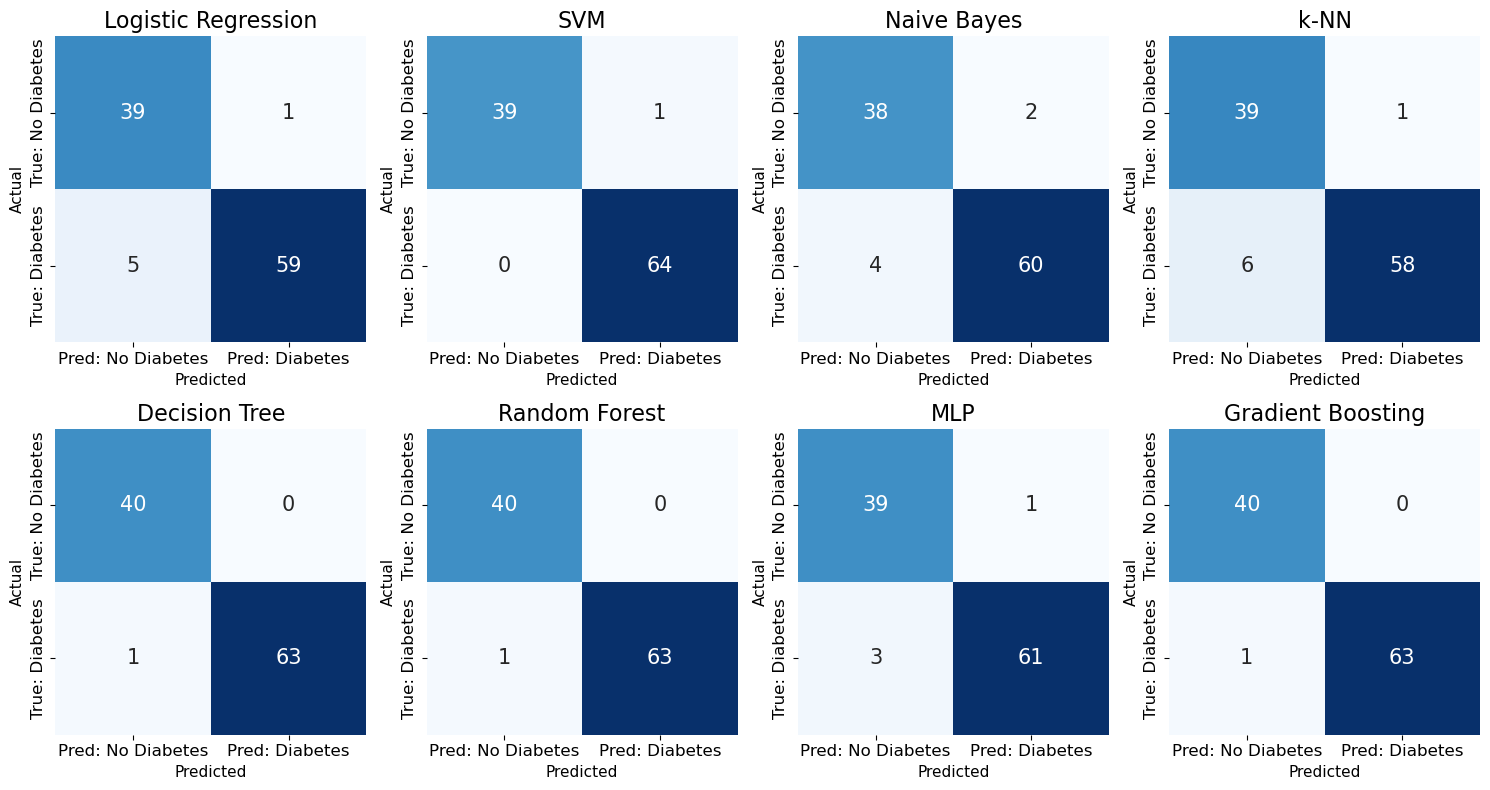

In [56]:

# Load the dataset
data = 'diabetes_data.csv'  # Replace with your file path
diabetes_data = pd.read_csv(data)

# Split the single column into multiple columns based on the semicolon delimiter
diabetes_data_cleaned = diabetes_data.iloc[:, 0].str.split(';', expand=True)

# Rename columns
columns = [
    "age", "gender", "polyuria", "polydipsia", "sudden_weight_loss", "weakness", 
    "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", 
    "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity", 
    "class"
]
diabetes_data_cleaned.columns = columns

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'class']:
    le = LabelEncoder()
    diabetes_data_cleaned[column] = le.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = le

# Separate features and target
X = diabetes_data_cleaned.drop(columns=["class"])
y = diabetes_data_cleaned["class"]

# Normalize numerical features
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and make predictions with each model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Create confusion matrices for each model
conf_matrices = {
    "Logistic Regression": confusion_matrix(y_test, logistic_predictions),
    "SVM": confusion_matrix(y_test, svm_predictions),
    "Naive Bayes": confusion_matrix(y_test, nb_predictions),
    "k-NN": confusion_matrix(y_test, knn_predictions),
    "Decision Tree": confusion_matrix(y_test, dt_predictions),
    "Random Forest": confusion_matrix(y_test, rf_predictions),
    "MLP": confusion_matrix(y_test, mlp_predictions),
    "Gradient Boosting": confusion_matrix(y_test, gb_predictions),
}

# Plot confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i, (model_name, cm) in enumerate(conf_matrices.items()):
    ax = axes[i // 4, i % 4]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, 
                xticklabels=['Pred: No Diabetes', 'Pred: Diabetes'], 
                yticklabels=['True: No Diabetes', 'True: Diabetes'],
                annot_kws={"size": 15})  # Increase font size in the heatmap cells
    ax.set_title(f'{model_name}', fontsize=16)  # Increase title font size
    ax.set_xlabel('Predicted', fontsize=11)  # Increase x-axis label font size
    ax.set_ylabel('Actual', fontsize=11)  # Increase y-axis label font size

    # Increase font size of tick labels
    ax.tick_params(axis='both', labelsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Performance Heatmap

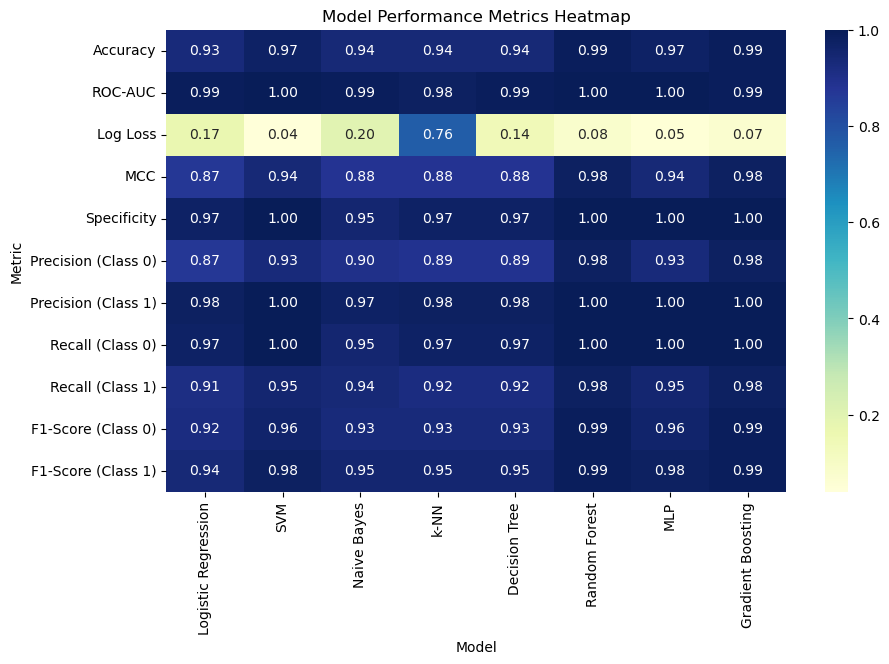

In [35]:
import seaborn as sns

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index("Model").T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Metric")
plt.xlabel("Model")
plt.show()


## Final Comparison and Conclusion

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


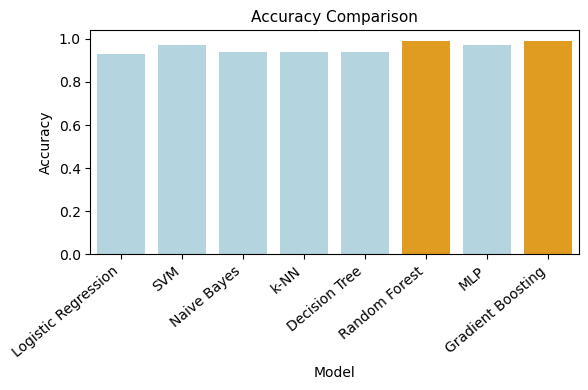

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


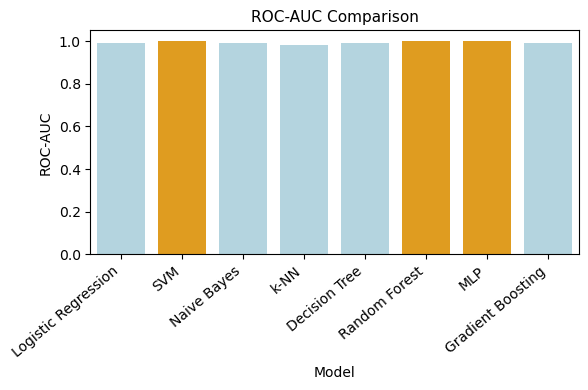

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


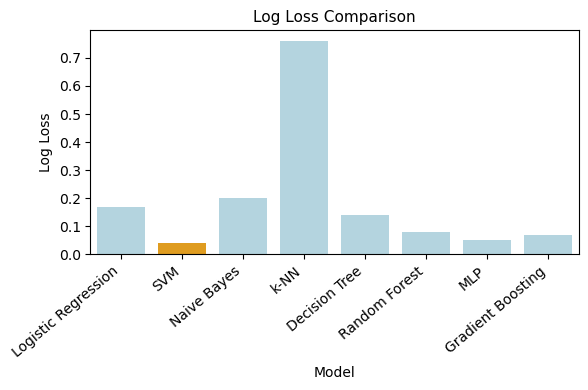

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


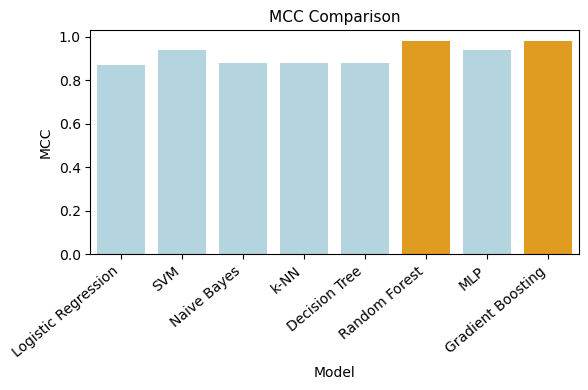

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


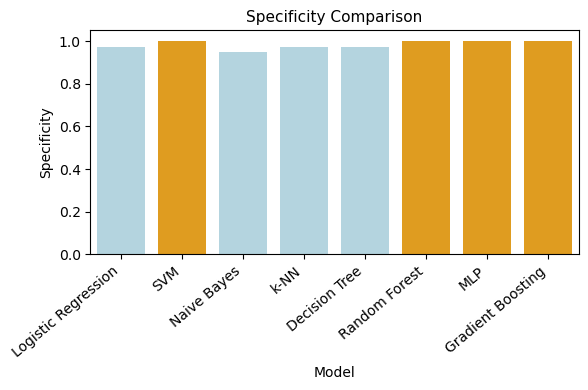

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


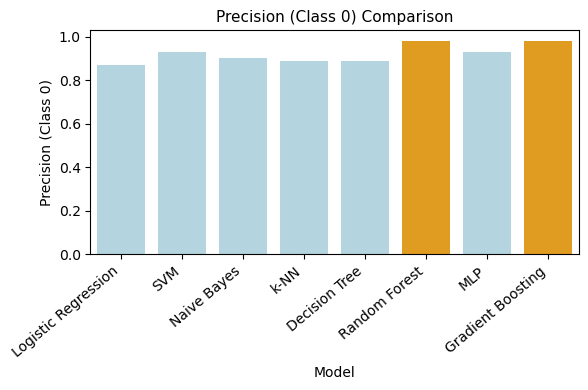

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


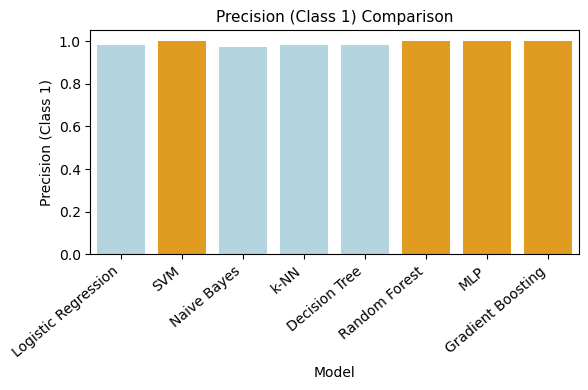

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


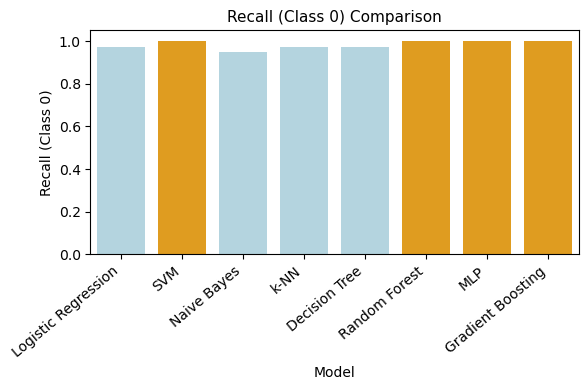

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


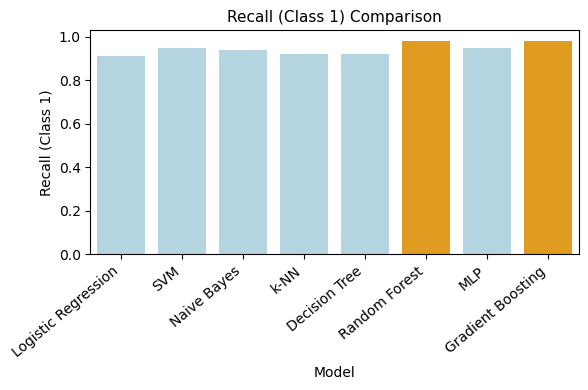

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


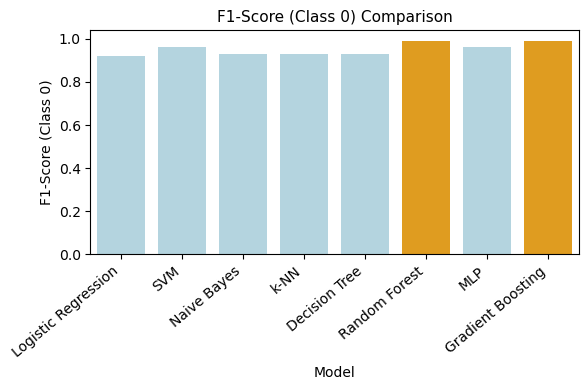

C:\Users\2004a\AppData\Local\Temp\ipykernel_2352\291908831.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


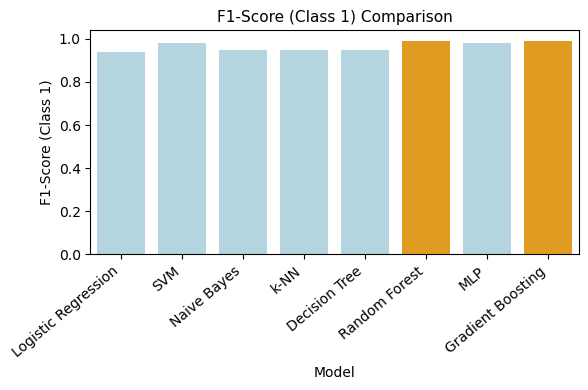

Based on all metrics, **Random Forest** performs the best overall due to its consistently high scores.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# List of metrics for plotting
metrics = ["Accuracy", "ROC-AUC", "Log Loss", "MCC", "Specificity", "Precision (Class 0)", "Precision (Class 1)",
           "Recall (Class 0)", "Recall (Class 1)", "F1-Score (Class 0)", "F1-Score (Class 1)"]

# Create individual plots for each metric
for metric in metrics:
    plt.figure(figsize=(6, 4))
    
    # Handle Log Loss separately since lower values are better
    if metric == "Log Loss":
        # Find the model with the lowest value for Log Loss
        best_model = df[df[metric] == df[metric].min()]["Model"].values
        # Create a list of colors where the best model is highlighted (low log loss is better)
        colors = ['orange' if model in best_model else 'lightblue' for model in df["Model"]]
    else:
        # Find the model with the highest value for other metrics
        best_model = df[df[metric] == df[metric].max()]["Model"].values
        # Create a list of colors where all models with the highest score are highlighted
        colors = ['orange' if model in best_model else 'lightblue' for model in df["Model"]]
    
    # Create the bar plot
    sns.barplot(x="Model", y=metric, data=df, palette=colors)
    
    # Title and labels
    plt.title(f"{metric} Comparison", fontsize=11)
    plt.xticks(rotation=40, ha='right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Final conclusion message
print("Based on all metrics, **Random Forest** performs the best overall due to its consistently high scores.")


## Random Forest is likely the best fit for  data because:

1. It handles both numerical and categorical features well.
2. It can model non-linear relationships between features.
3. It is robust to outliers and noise.
4. It performs well with imbalanced datasets.
5. It reduces the risk of overfitting through ensemble learning.
6. It provides feature importance, which can be useful for understanding your data.